# **Maestría en Inteligencia Artificial Aplicada**

# Análisis PCA

*Materia: Ciencia y Analítica de Datos*

*Profesor: Jobish Vallikavungal*

*A01273800 José Eduardo Arteaga Valdés*

*A01793499 Diego Fernando Guerra Burgos*

11 de Octubre 2022

Primero cargamos las bibliotecas necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Cargamos la Base de Datos para el ejercicio y le damos nombre a las columnas

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
column_names = ['ID','credit_given', 'gender', 'education', 'marital_status', 'age', 'payment_status_sep_05', 'payment_status_aug_05',
                'payment_status_jul_05', 'payment_status_jun_05', 'payment_status_may_05', 'payment_status_apr_05', 'bill_statement_sep_05',
                'bill_statement_aug_05', 'bill_statement_jul_05', 'bill_statement_jun_05', 'bill_statement_may_05', 'bill_statement_apr_05',
                'previous_statement_sep_05', 'previous_statement_aug_05', 'previous_statement_jul_05', 'previous_statement_jun_05', 'previous_statement_may_05',
                'previous_statement_apr_05', 'default']
df.columns = column_names
df.head()

,ID,credit_given,gender,education,marital_status,age,payment_status_sep_05,payment_status_aug_05,payment_status_jul_05,payment_status_jun_05,...,bill_statement_jun_05,bill_statement_may_05,bill_statement_apr_05,previous_statement_sep_05,previous_statement_aug_05,previous_statement_jul_05,previous_statement_jun_05,previous_statement_may_05,previous_statement_apr_05,default
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Copiamos el código de la anterior actividad para limpiar la base de datos y asegurarnos que no existen NA en la base. 

In [ ]:
payment_status_columns = [string for string in column_names if 'payment_status' in string]
clean_df = df.copy()
clean_df.dropna(subset = ['gender', 'education', 'marital_status', 'default'], inplace = True)
clean_df.dropna(subset= payment_status_columns, inplace = True)
print (df.shape[0] - clean_df.shape[0], 'filas han sido eliminadas por NA en variables categóricas')
filas_iniciales = clean_df.shape[0]

clean_df = clean_df[(clean_df['gender'] == 1) | (clean_df['gender'] == 2)]


clean_df = clean_df[(clean_df['education'] == 1) | (clean_df['education'] == 2)| (clean_df['education'] == 3) | (clean_df['education'] == 4)]


clean_df = clean_df[(clean_df['marital_status'] == 1) | (clean_df['marital_status'] == 2) | (clean_df['marital_status'] == 3)]


clean_df = clean_df[(clean_df['default'] == 1) | (clean_df['default'] == 0)]

filas_finales = clean_df.shape[0]
print ('Se eliminó', filas_iniciales-filas_finales, 'registros que contenían formatos incorrectos de variables categóricas')
clean_df['age'].fillna(value = clean_df.age.mean(), inplace = True)

if clean_df.age.isna().any() == False:
    print ('No hay valores NA en la columna age')
else:
    print ('fill NA con media de age no funcionó')


clean_df = clean_df.astype({'age':'int'})

filas_iniciales = clean_df.shape[0]
clean_df.dropna(thresh=9, inplace = True)
filas_finales = clean_df.shape[0]
print ('Se eliminó', filas_iniciales-filas_finales, 'registros')

filas_iniciales = clean_df.shape[0]
clean_df.dropna(inplace = True)
filas_finales = clean_df.shape[0]
print ('Se eliminó', filas_iniciales-filas_finales, 'registros de NA en columnas de statement')

print('Se eliminaron', df.shape[0] - clean_df.shape[0], 'registros en el proceso de limpieza de datos')

25 filas han sido eliminadas por NA en variables categóricas
Se eliminó 399 registros que contenían formatos incorrectos de variables categóricas
No hay valores NA en la columna age
Se eliminó 0 registros
Se eliminó 14 registros de NA en columnas de statement
Se eliminaron 438 registros en el proceso de limpieza de datos


Dado que el PCA se realiza sobre variables numéricas, procedemos a seleccionar las columnas que contienen variables numéricas para crear la base de datos que utilizaremos para el PCA

In [ ]:
numerical_variables = ['credit_given', 'age', 'bill_statement_sep_05', 'bill_statement_aug_05', 'bill_statement_jul_05',
                       'bill_statement_jun_05', 'bill_statement_may_05', 'bill_statement_apr_05', 'previous_statement_sep_05',
                       'previous_statement_aug_05', 'previous_statement_jul_05', 'previous_statement_jun_05',
                       'previous_statement_may_05', 'previous_statement_apr_05']
ndf = clean_df[numerical_variables]
ndf.head()

,credit_given,age,bill_statement_sep_05,bill_statement_aug_05,bill_statement_jul_05,bill_statement_jun_05,bill_statement_may_05,bill_statement_apr_05,previous_statement_sep_05,previous_statement_aug_05,previous_statement_jul_05,previous_statement_jun_05,previous_statement_may_05,previous_statement_apr_05
0,20000,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Creamos la matriz de correlación de las variables numéricas.

In [ ]:
corr = ndf.corr()
corr

#al observar la tabla de correlación observamos que las variables con alta correlación son aquellas que miden el valor a pagar de cada mes (bill_statement).

,credit_given,age,bill_statement_sep_05,bill_statement_aug_05,bill_statement_jul_05,bill_statement_jun_05,bill_statement_may_05,bill_statement_apr_05,previous_statement_sep_05,previous_statement_aug_05,previous_statement_jul_05,previous_statement_jun_05,previous_statement_may_05,previous_statement_apr_05
credit_given,1.000000,0.143990,0.283827,0.276806,0.281890,0.293582,0.295407,0.289811,0.195714,0.177637,0.210485,0.203250,0.217229,0.219678
age,0.143990,1.000000,0.054824,0.052571,0.052040,0.050013,0.048493,0.046913,0.025272,0.022436,0.029491,0.021525,0.021462,0.019194
bill_statement_sep_05,0.283827,0.054824,1.000000,0.951257,0.891872,0.861223,0.831398,0.804824,0.140465,0.098901,0.156787,0.157609,0.165013,0.175750
bill_statement_aug_05,0.276806,0.052571,0.951257,1.000000,0.927784,0.893396,0.861450,0.833826,0.280899,0.100566,0.151006,0.146450,0.155415,0.170668
bill_statement_jul_05,0.281890,0.052040,0.891872,0.927784,1.000000,0.925081,0.885658,0.855556,0.244575,0.318034,0.131078,0.142440,0.177523,0.179497
bill_statement_jun_05,0.293582,0.050013,0.861223,0.893396,0.925081,1.000000,0.940461,0.902335,0.233243,0.208149,0.300246,0.128986,0.159990,0.175025
bill_statement_may_05,0.295407,0.048493,0.831398,0.861450,0.885658,0.940461,1.000000,0.947199,0.218743,0.181957,0.252505,0.293202,0.140840,0.162031
bill_statement_apr_05,0.289811,0.046913,0.804824,0.833826,0.855556,0.902335,0.947199,1.000000,0.202056,0.173798,0.234570,0.250145,0.307474,0.115464
previous_statement_sep_05,0.195714,0.025272,0.140465,0.280899,0.244575,0.233243,0.218743,0.202056,1.000000,0.286749,0.253667,0.200101,0.149734,0.186267
previous_statement_aug_05,0.177637,0.022436,0.098901,0.100566,0.318034,0.208149,0.181957,0.173798,0.286749,1.000000,0.246064,0.179580,0.182268,0.157735


Antes de hacer el PCA tenemos que normalizar los datos para que todos esten dentro de la misma escala.
Para esto utilizaremos StandardScaler de la libreria sklearn.prepocessing.

In [ ]:
scaler = StandardScaler()
ndf_scaled = scaler.fit_transform(ndf)
ndf_scaled = pd.DataFrame(ndf_scaled)
ndf_scaled.columns = numerical_variables
ndf_scaled.head() #asegurarnos que los datos se encuentran en la misma escala

,credit_given,age,bill_statement_sep_05,bill_statement_aug_05,bill_statement_jul_05,bill_statement_jun_05,bill_statement_may_05,bill_statement_apr_05,previous_statement_sep_05,previous_statement_aug_05,previous_statement_jul_05,previous_statement_jun_05,previous_statement_may_05,previous_statement_apr_05
0,-1.136185,-1.244646,-0.641186,-0.646310,-0.667078,-0.671676,-0.662864,-0.652872,-0.340993,-0.225545,-0.295706,-0.307416,-0.314595,-0.293571
1,-0.366612,-1.027466,-0.657956,-0.665716,-0.638260,-0.620731,-0.605969,-0.598108,-0.340993,-0.212084,-0.238858,-0.243805,-0.314595,-0.180371
2,-0.597484,-0.158748,-0.296171,-0.492347,-0.480980,-0.448543,-0.416711,-0.391746,-0.249420,-0.190442,-0.238858,-0.243805,-0.249035,-0.010572
3,-0.905313,0.167021,-0.054350,-0.010291,0.035699,-0.230830,-0.185988,-0.156666,-0.220344,-0.167978,-0.227489,-0.237444,-0.244511,-0.236971
4,-0.905313,2.338815,-0.577104,-0.610120,-0.158872,-0.345642,-0.347581,-0.331590,-0.220344,1.332317,0.272771,0.265085,-0.269424,-0.255140


Ejecutamos el código para realizar PCA 

In [ ]:
pcs = PCA()
pcs_t = pcs.fit_transform(ndf_scaled)

Aquí observamos la proporción de la varianza acumulada de cada componente que arroja el PCA. Para esto guardamos la info del PCA en un nuevo data frame.

In [ ]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()

pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)


pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.433541,1.311636,1.022214,0.961932,0.940136,0.934306,0.882595,0.851804,0.840562,0.510774,0.265159,0.201322,0.157633,0.152563
Proportion of variance,0.422994,0.122881,0.074635,0.066092,0.063130,0.062350,0.055639,0.051825,0.050466,0.018634,0.005022,0.002895,0.001775,0.001662
Cumulative proportion,0.422994,0.545875,0.620510,0.686602,0.749732,0.812082,0.867721,0.919546,0.970011,0.988646,0.993668,0.996563,0.998338,1.000000


Realizamos un scree plot para observar esta tabla en gráfico y poder determinar cuáles son los componentes mínimos a escoger.

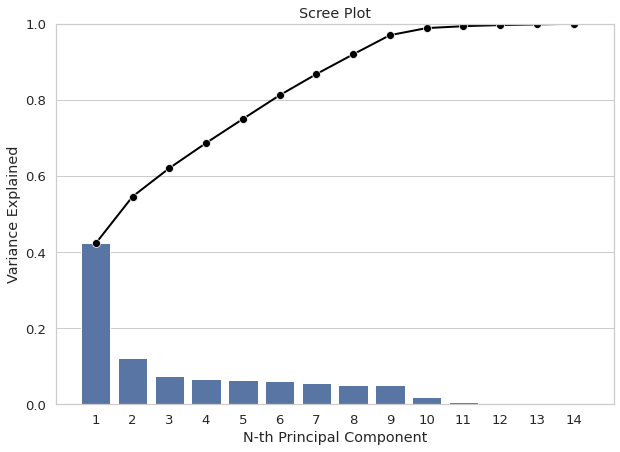

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components,
                y = pcs.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pcs.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Procedemos a calcular los coeficientes y magnitud de las variables originales en cada componente calculado en el PCA. Esto nos ayuda a determinar cual es la variable que más aporta a la varianza en cada componente observado.

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary_df.columns,
                                index = ndf_scaled.columns
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
credit_given,0.164887,0.301311,-0.378848,-0.206555,0.029399,-0.075987,0.123414,-0.068554,-0.817403,-0.028547,-0.005240,0.016185,-0.000847,0.003258
age,0.032019,0.072607,-0.870154,0.338118,-0.029995,0.073694,-0.085426,0.032390,0.327810,-0.008415,-0.000561,-0.001334,0.000353,0.001027
bill_statement_sep_05,0.372354,-0.191318,-0.034632,-0.065578,0.037624,-0.042925,0.009461,0.009785,0.011041,0.570042,0.416460,-0.432992,-0.204729,-0.296481
bill_statement_aug_05,0.383187,-0.175036,-0.001790,0.005304,0.081286,-0.031327,-0.029709,-0.136333,0.020460,0.386878,0.034243,0.358710,0.378422,0.610163
bill_statement_jul_05,0.388269,-0.126694,0.035205,0.059962,0.116337,0.094366,-0.123446,0.091358,-0.024069,0.118441,-0.490964,0.484507,-0.139262,-0.522056
bill_statement_jun_05,0.391638,-0.120183,0.032786,0.073238,0.031005,0.016421,0.125385,0.041213,0.018549,-0.205890,-0.518705,-0.498729,-0.318589,0.380878
bill_statement_may_05,0.388765,-0.105261,0.031671,0.039711,-0.105893,-0.098388,-0.007705,0.050439,0.022411,-0.419834,0.076144,-0.239800,0.699704,-0.286450
bill_statement_apr_05,0.381166,-0.092824,0.018138,-0.067159,-0.162494,0.072370,0.004759,0.001967,0.060495,-0.487755,0.510344,0.335392,-0.428342,0.107745
previous_statement_sep_05,0.135543,0.383289,0.174788,0.355370,0.231470,0.022529,-0.194463,-0.751790,0.037693,-0.055067,0.047078,-0.070901,-0.051897,-0.079993
previous_statement_aug_05,0.116981,0.407787,0.201367,0.350815,0.164062,0.394481,-0.293396,0.568299,-0.134455,0.052657,0.148837,-0.065800,0.050611,0.122210


Luego procedemos a observar cuál variable es la que más aporta en cada compontente. Al igual que la que menos aporta. 

In [ ]:
pcs_df = pd.DataFrame(pcs_t, columns = pcsSummary_df.columns)
comps_df = pd.DataFrame(pcs.components_.round(4), columns = pcs_df.columns,
                        index = ndf_scaled.columns) 

comps_df.iloc[:,:8].abs().idxmax()

#Aqui podemos que variable es la que más explica en cada componente principal que observamos
#En el primer componente es la variable 'previous_statement_sep_05'

PC1    previous_statement_sep_05
PC2        bill_statement_sep_05
PC3    previous_statement_aug_05
PC4    previous_statement_apr_05
PC5    previous_statement_apr_05
PC6    previous_statement_jul_05
PC7    previous_statement_may_05
PC8    previous_statement_jul_05
dtype: object

Por último, procedemos a graficar box-plot para cada variable numérica que forma parte del PCA.
 

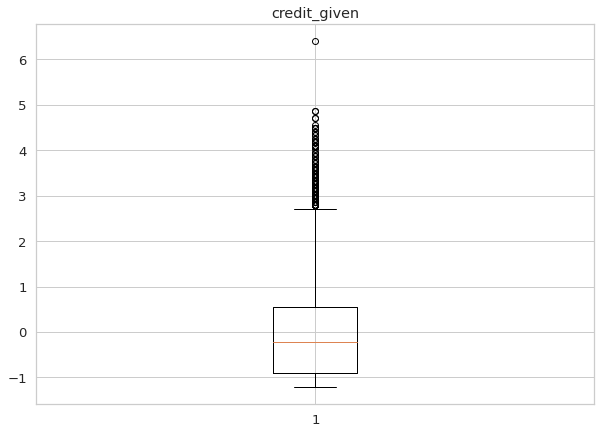

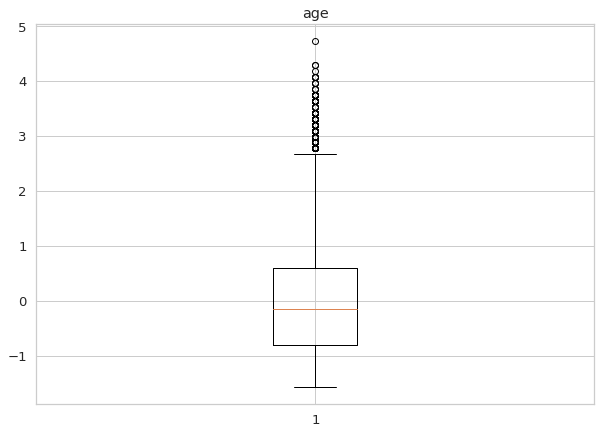

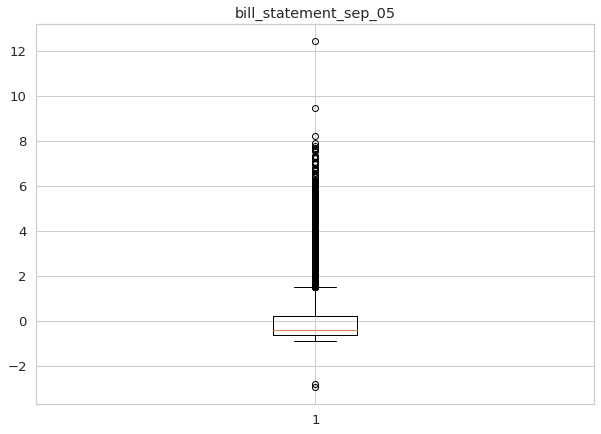

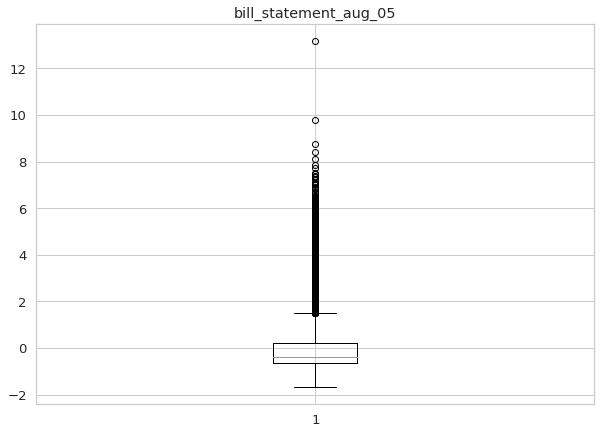

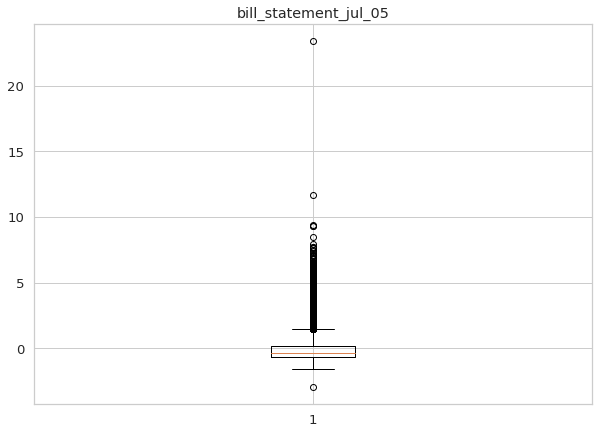

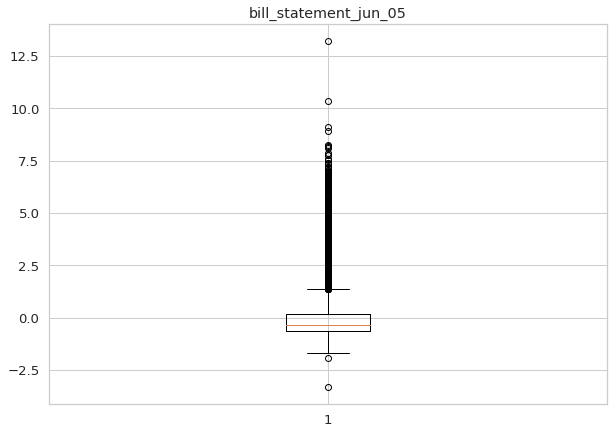

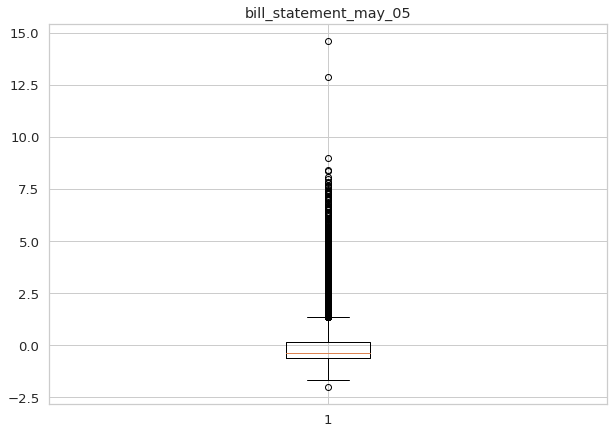

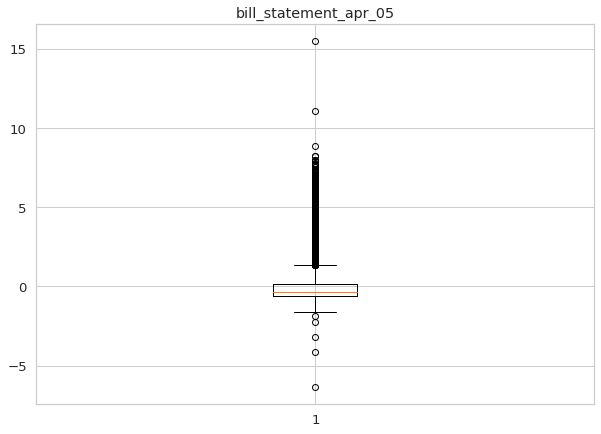

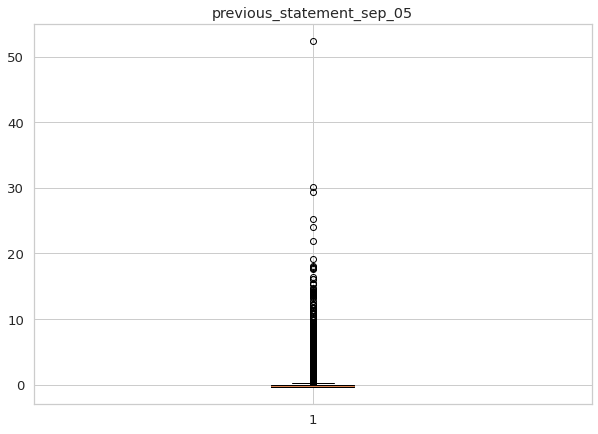

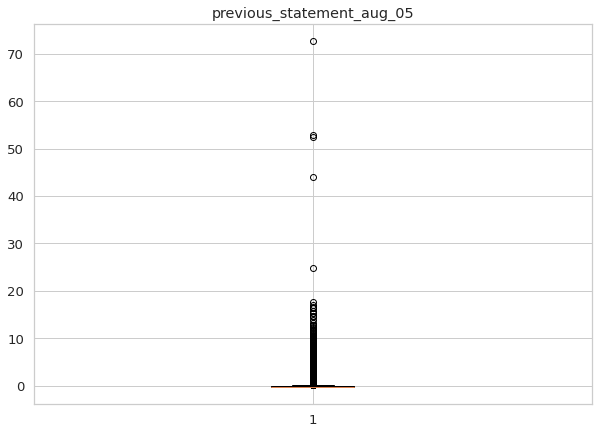

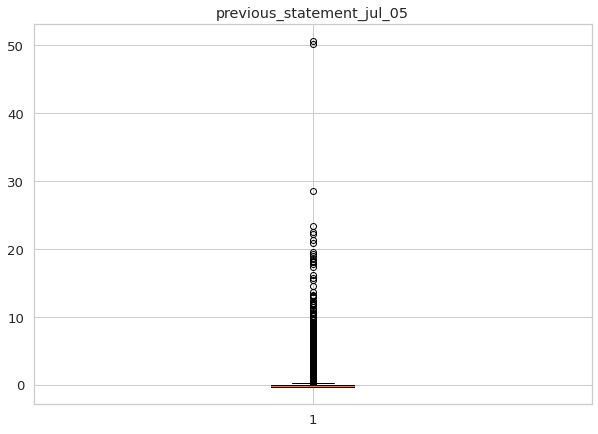

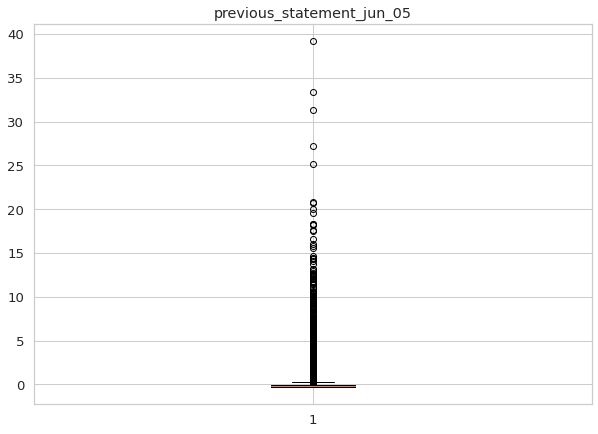

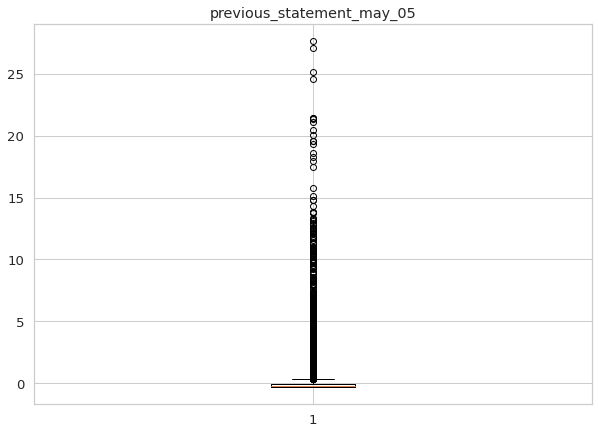

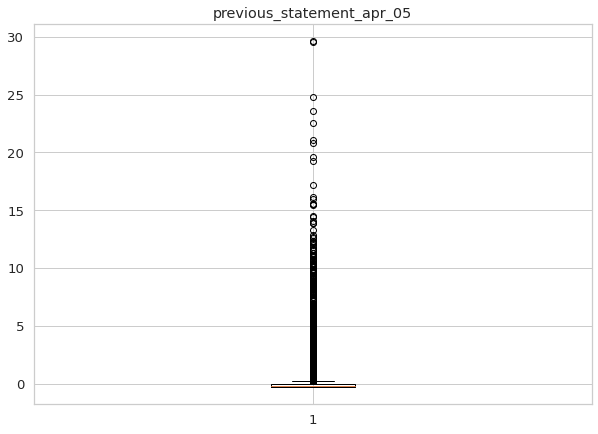

In [ ]:
for variable in numerical_variables:
    plt.figure(figsize=(10, 7))
    plt.title(variable)
    plt.boxplot(ndf_scaled[variable])
    plt.show()

Los valores atípicos son aquellos que se encuentran en los extremos de cada gráfico ya que se encuentran fuera de los límites del primer y tercer cuartil (donde se ubica la mayor cantidad de datos).

***Respuestas de la parte 2.***

**1.	¿Cuál es el número de componentes mínimo y por qué?**

Dependiendo del valor que queremos explicar de nuestra varianza. Si nuestro valor mínimo de varianza es de 80%, el mínimo sería de 6 componentes mientras que, si queremos que el porcentaje explicado de varianza sea del 90%, el valor mínimo de componentes será de 8. Para este caso vamos a seleccionar los componentes que al menos expliquen el 90% de varianza. Por lo tanto elegimos 8 componentes mínimos para este ejercicio. 

**2.	¿Cuál es la variación de los datos que representan esos componentes?**

Para nuestro caso, los 8 componentes principales representan el 91,9% de la varianza de los datos originales. 

**3.	¿Cuál es la pérdida de información después de realizar PCA?**

En teoría no existe pérdida de información cuando se aplica el PCA. La pérdida de información se da al elegir el número mínimo de componentes, en este caso al seleccionar 8 componentes que explican aproximadamente el 91,9% de la varianza, por lo cual perdemos información que explica el 8,1% de la varianza observada.

**4.	De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

El primer componente explica aproximadamente el 42% de la varianza y dentro de este componente la variable ‘previous_statement_sep_05’ es la más importante. Mientras que si observamos al primer componente, la variable que menos importancia tiene es ‘previous_statement_may_05’. Esta respuesta se debe realizar por componentes, debido a que por cada componente, el peso de las variables es diferente y no podemos asegurar cual es la menos importante.  

**5.	¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

El algoritmo de PCA se puede utilizar como un técnica de preprocesamiento o limpieza de los datos antes de ser utilizada en un algoritmo propio de Machine Learning. En específico, provee diversos beneficios en la calidad de los datos. Por ejemplo, puede:
reducir el número de dimensiones del set de datos
eliminar el ruido de los datos
eliminar variables correlacionadas
evitar el overfitting en un algoritmo de ML
y mejorar el performance del algoritmo en rasgos generales.
Y a pesar de que impacte en pérdida de información, provee más beneficios que desventajas. Sobre todo, por su enfoque en los principales componentes de un set de datos; es decir, por su enfoque en explicar la mayor varianza de las variables originales. 
Algunos casos de uso específicos son: análisis de acciones, generación de predicciones financieras o redimensionamiento de imágenes.

**Referencias**

IBM Cloud Education. (2021). Overfitting. Recuperado el 11 de octubre de 2022, de: https://www.ibm.com/cloud/learn/overfitting 

Keboola. (2022). A Guide to Principal Component Analysis (PCA) for Machine Learning. Recuperado el 11 de octubre de 2022, de: https://www.keboola.com/blog/pca-machine-learning 

Lee, W. (2022). Using Principal Component Analysis (PCA) for Machine Learning. Towards Data Science. Recuperado el 11 de octubre de 2022, de: https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e 

Simplilearn. (2022).  PCA In Machine Learning - Your Complete Guide To Principal Component Analysis. Recuperado el 11 de octubre de 2022, de: https://www.simplilearn.com/tutorials/machine-learning-tutorial/principal-component-analysis 
